# Machine learning tutorial Feb 11th 2021  
From Edward Morrissey

Original data had 10,000 cells per cell type I’ve processed and filtered the
data
- 400 cells per file and ~6,000 genes that were filtered on expression level and variability
- Data is normalised by dividing by the total counts per cell and multiplied by 10,000

TODO  
Read in the data - this is a single cell RNAseq dataset published in 2017  
We are pulling in 10 different cell types and concatenating them, so that then we can find a model that will separate them out.



In [47]:
import pandas as pd
import numpy as np
import umap
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("white") #change the graph style so no background 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [7]:

#create a list of the datasets (10 .gz files)
data_sets = os.listdir("/ifs/obds-training/jan21/exercises/machine_learning/Sep_data/")

#read in each dataset in the folder (for file_i in) tells us to iterate over each file in the list and create a pandas datafram
#This is called list comprehension
#It creates a list of dataframe objects
all_data   = [pd.read_csv("/ifs/obds-training/jan21/exercises/machine_learning/Sep_data/" + file_i) for file_i in data_sets]

#concatenate the datasets
all_data   = pd.concat(all_data)

#create a label for each cell type (400 is because there are 400 cells in each class)
labels     = np.repeat(data_sets, 400)

#make a row number for each label
labels_num = np.repeat(range(len(data_sets)), 400)

In [14]:
labels_num

array([0, 0, 0, ..., 9, 9, 9])

In [15]:
labels

array(['naive_t.gz', 'naive_t.gz', 'naive_t.gz', ...,
       'naive_cytotoxic.gz', 'naive_cytotoxic.gz', 'naive_cytotoxic.gz'],
      dtype='<U18')

In [8]:
data_sets #this is a list

['naive_t.gz',
 'cd56_nk.gz',
 'memory_t.gz',
 'cd4_t_helper.gz',
 'cd34.gz',
 'regulatory_t.gz',
 'b_cells.gz',
 'cd14_monocytes.gz',
 'cytotoxic_t.gz',
 'naive_cytotoxic.gz']

In [11]:
all_data

,A1BG,AAAS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARSD1,AASDHPPT,...,ZNHIT3,ZNHIT6,ZNRD1,ZRANB2,ZRSR2,ZSCAN16,ZSCAN16-AS1,ZSCAN18,ZSWIM7,ZYX
0,0.000000,7.722008,0.0,0.0,0.000000,0.0,0.00000,7.722008,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,7.722008
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,8.488964,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,8.488964,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9.174312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4.945598,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.945598
396,0.000000,0.000000,0.0,0.0,4.873294,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,4.873294,0.0,0.0,0.0,0.0,0.000000
397,5.706134,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
398,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [12]:
all_data.shape

(4000, 6188)

**Plot the data**
- Use umap with 20 neighbours to get lower dim for plotting
- Create a data frame with umap dims and labels as an extra column
- Use seaborn to scatterplot and colour by cell type

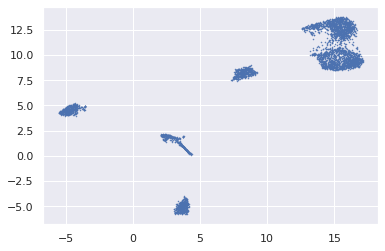

In [19]:
#from umap function use UMAP library with given parameters
umap_instance = umap.UMAP(n_components = 2, n_neighbors = 20)
umap_transformed = umap_instance.fit_transform(all_data)
#plot first vs second component
#markersize changes the size of the dots
plt.plot(umap_transformed[:,0], umap_transformed[:,1], "o", markersize = 0.5)

Create a data frame with umap dims and labels as an extra column   
Use seaborn to scatterplot and colour by cell type  
This will enable us to see different colours for each cell type

In [40]:
#create the dataframe. T means transpose (otherwise we get 3 rows x 4000 columns)
umap_bloodcells = pd.DataFrame([labels, umap_transformed[:,0], umap_transformed[:,1]]).T
#assign column names
umap_bloodcells.columns = ["Labels", "Dim_1", "Dim_2"]
umap_bloodcells

,Labels,Dim_1,Dim_2
0,naive_t.gz,15.202,12.5046
1,naive_t.gz,15.164,12.7678
2,naive_t.gz,16.361,12.2771
3,naive_t.gz,16.5897,12.579
4,naive_t.gz,16.057,11.8775
...,...,...,...
3995,naive_cytotoxic.gz,16.4921,9.22889
3996,naive_cytotoxic.gz,16.7479,9.30036
3997,naive_cytotoxic.gz,16.8136,9.69618
3998,naive_cytotoxic.gz,16.0189,9.22635


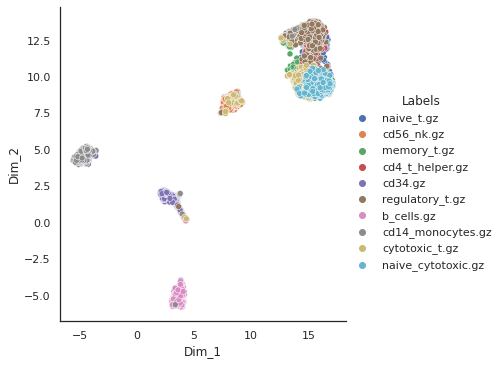

In [48]:
#plot using seaborn
sns.relplot(data=umap_bloodcells, x="Dim_1", y="Dim_2", hue = "Labels")

## Split data into train and test and run decision tree  
- Use “from sklearn.model_selection import train_test_split”
- Split the data and the labels into 0.25 test data  
- Train the DecisionTreeClassifier  
- Use the score method to see how well it predicts
- Do this for both the train and test data
- Are the values different? What does it mean?

In [50]:
#Split the data and the labels into 0.25 test data
#define the four separate parts and then perform the split
data_train, data_test, labels_train, labels_test = train_test_split(all_data, labels_num, test_size=0.25)

In [51]:
## Create classifier object
clf = DecisionTreeClassifier()
## Fit the data with the classifier. We are using the default parameters
clf = clf.fit(data_train, labels_train)

In [55]:
#score the method
test_score = clf.score(data_test, labels_test)
print("test score is", test_score)
train_score = clf.score(data_train, labels_train)
print("train score is", train_score)

test score is 0.708
train score is 1.0


In [56]:
#do some predictions
clf.predict(data_test) #would need to look at a slice of this data and compare with the train data to be meaningful


array([9, 5, 4, 3, 4, 7, 3, 6, 0, 6, 1, 0, 5, 0, 1, 9, 7, 6, 3, 9, 0, 4,
       6, 7, 1, 6, 7, 2, 7, 4, 8, 2, 8, 8, 6, 9, 2, 5, 4, 2, 7, 5, 5, 7,
       4, 3, 5, 2, 3, 6, 4, 5, 1, 6, 8, 5, 5, 6, 2, 1, 8, 8, 0, 6, 6, 1,
       5, 5, 7, 4, 1, 0, 4, 5, 5, 5, 8, 6, 3, 3, 1, 2, 7, 0, 8, 3, 1, 8,
       5, 0, 9, 5, 1, 6, 3, 3, 5, 8, 2, 2, 0, 6, 3, 7, 4, 1, 8, 9, 5, 4,
       6, 5, 2, 9, 2, 4, 1, 1, 2, 3, 4, 3, 7, 2, 8, 7, 5, 0, 6, 9, 1, 4,
       6, 7, 0, 6, 0, 9, 8, 2, 2, 4, 5, 8, 0, 2, 5, 9, 2, 2, 4, 7, 5, 8,
       3, 5, 2, 1, 9, 0, 8, 5, 1, 9, 5, 3, 4, 8, 5, 4, 9, 4, 6, 7, 6, 0,
       8, 7, 2, 4, 5, 1, 2, 4, 0, 0, 9, 0, 2, 2, 2, 2, 2, 7, 1, 2, 1, 9,
       9, 1, 8, 9, 3, 0, 6, 6, 7, 3, 1, 4, 5, 6, 0, 8, 5, 5, 7, 5, 9, 9,
       5, 2, 1, 1, 3, 2, 7, 6, 5, 9, 4, 2, 8, 5, 6, 9, 0, 4, 1, 2, 0, 0,
       8, 5, 7, 6, 6, 2, 0, 4, 6, 4, 0, 9, 1, 0, 1, 9, 5, 5, 8, 3, 8, 1,
       0, 6, 4, 8, 4, 4, 8, 2, 6, 2, 9, 4, 1, 2, 8, 5, 3, 6, 1, 4, 9, 6,
       5, 7, 7, 4, 8, 6, 7, 6, 7, 6, 8, 3, 9, 2, 0,

Random forest  
● Train a random forest with the same data  
● Calculate the score for training data and test data  
    ○ Has it changed?  
    ○ Better or worse?  
● Change the number of trees used (n_estimators) to 250  
    ○ Does it improve the score?  

In [60]:
clf_forest = RandomForestClassifier(n_estimators = 250) #including estimators improves the outcome
clf_forest = clf_forest.fit(data_train, labels_train)

In [61]:
#score the method (it shows an improvement over the decision tree classifier)
test_score = clf_forest.score(data_test, labels_test)
print("forest test score is", test_score)
train_score = clf_forest.score(data_train, labels_train)
print("forest train score is", train_score)

forest test score is 0.846
forest train score is 1.0


- The random forest can calculate the importance for each feature it uses (genes) to classify
- Look at the top features (stored in the fit object “feature_importances_”)
- Do the top genes make sense?
- The feature scoring is known to have a few biases but still very useful

In [64]:
#make a dataframe of clf_forest.clf.feature_importances_ with column name "importance"
feature_importances = pd.DataFrame(clf_forest.feature_importances_,
                                   index = all_data.columns,
                                  columns=['importance']).sort_values('importance', ascending = False)

feature_importances
#This shows us the which genes are most important for separating the groups

,importance
CD8B,0.010352
CD74,0.008797
HLA-DRB1,0.008627
HLA-DRA,0.007616
TYROBP,0.007261
...,...
PIK3AP1,0.000000
ANAPC4,0.000000
RPP40,0.000000
NPEPPS,0.000000


## More classifiers
● Choose another two classifiers from the scikit list and repeat  
● Are any of them better than the random forest?

In [66]:
#choose a different classifier, in this case SVC
#they should all give similar answers if they are true.
clf_svm = svm.SVC() 
clf_svm = clf_svm.fit(data_train, labels_train)
clf_svm.score(data_test, labels_test)

0.879

## Misclassification and plotting
● To study the misclassification calculate the confusion matrix  
  ○ from sklearn.metrics import confusion_matrix  
● Run on the prediction and true labels  
● Convert to pandas df to add rows and columns names  
  ○ pd.DataFrame(cm, index = data_sets, columns=data_sets)  
  ○ Where does the algorithm do well?  
  ○ Where does it do poorly  
● Plot two umaps next to each other using subfigures  
  ○ Colour code one with the true labels  
  ○ Colour the other one with the predicted labels  

## Extra: genes and proteins
● Purified populations used CD proteins  
● Latest data sets measure these proteins as well as genes  
● If you classify the cells with the genes does this give the same CD populations?  
● Load latest dataset with protein  
https://support.10xgenomics.com/single-cell-gene-expression/datasets/3.1.0/5k_pbmc_protein_v3?  
● Process the data divide by total reads per cell x 10,000 (separate the proteins)  
● Classify cells with classifier  
○ Histogram protein levels for each class  